<a href="https://colab.research.google.com/github/lakhanrajpatlolla/aiml-learning/blob/master/U2W8_29_PCAwithEigenFaces_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objectives

At the end of the experiment,  you will be able to :

* Understand how to derive Eigen faces using PCA
* Use the PCA features for classification purpose

In [ ]:
#@title Experiment Walkthrough Video

from IPython.display import HTML
HTML("""<video width="854" height="480" controls>
<source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/aiml_2018_b7_hyd/experiment_details_backup/pca_with_eigen_faces.mp4" type="video/mp4">
</video>""")



## Dataset

### Description

The dataset chosen for this experiment is a preprocessed excerpt of the “Labeled Faces in the Wild”, aka LFW.

Labeled Faces in the Wild, a database of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. The only constraint on these faces is that they were detected by the Viola-Jones face detector.

## AI / ML Technique

### Eigen Faces

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2418775" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959000490" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U2W8_29_PCAwithEigenFaces_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Importing Required Packages

In [4]:
from time import time
import matplotlib.pyplot as plt

# Importing Sklearn Packages
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

## Download the data

Load the Labeled Faces in the Wild (LFW) people dataset, To know more about LFW people dataset refer [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html)

In [5]:
# Loading and Downloading data from sklearn
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Storing images arrays shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

`lfw_poeple` provides various attributes, where in `lfw_people.images` is the features of 3-dimensional shape and `lfw_people.data` holds the same information of images which is flattened array of images (1-dimensional array)

## Assigning lfw_people data to the X variable, by using the 'data' attribute.

In [6]:
X = lfw_people.data

# Data is stored in X, where the shape of X is (no.of samples, no.of features)
n_features = X.shape[1]
X.shape[0], X.shape[1]

(1288, 1850)

In [7]:
# The label is the id of the person
y = lfw_people.target

# Loading the target names (Label names)
target_names = lfw_people.target_names

# Checkinq no.of classes
n_classes = target_names.shape[0]

print("Target names:", target_names)
print("\nTotal dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Target names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


## Split into a training and testing set using train_test_split sklearn function


In [8]:
X.shape, y.shape

((1288, 1850), (1288,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape

((966, 1850), (322, 1850))

## Performing PCA on the face images, otherwise known as Eigenfaces

## Compute the PCA

In PCA, a parameter Whiten = True, will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

Whitening just makes our resulting data have a unit variance, which has been shown to produce better results

In [10]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

# Starting the timer
t0 = time()

# Trying to extract PCA features using PCA function from sklearn
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

# Printing the time taken to extract the features
print("done in %0.3fs" % (time() - t0))

# Storing the eigen faces and reshaping to 3 dimensions
# pca.components_ is the set of all eigenvectors of the covariance matrix (one eigenvector for each principal component)
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 966 faces
done in 0.583s


In [11]:
pca.components_.shape

(150, 1850)

In [12]:
eigenfaces.shape

(150, 50, 37)

## Projecting the input data on the eigenfaces orthonormal basis


In [13]:
t0 = time()
# Transforming the data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.079s


In [14]:
# Checking for the shape of the original and pca data
X_train.shape, X_train_pca.shape, X_test.shape, X_test_pca.shape

((966, 1850), (966, 150), (322, 1850), (322, 150))

## Train a Linear Classifier

## Fitting the classifier to the training set

In [15]:
t0 = time()

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

In [16]:
# Fit the data
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))

done in 2.340s


##  Quantitative evaluation of the model quality on the test set

In [17]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)

print("done in %0.3fs" % (time() - t0))
print("accuracy is", accuracy_score(y_test,y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set
done in 0.009s
accuracy is 0.7236024844720497

classification report
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.35      0.52        17
     Colin Powell       0.71      0.68      0.70        66
  Donald Rumsfeld       0.79      0.42      0.55        26
    George W Bush       0.68      0.90      0.78       141
Gerhard Schroeder       0.95      0.70      0.81        30
      Hugo Chavez       1.00      0.31      0.47        13
       Tony Blair       0.70      0.66      0.68        29

         accuracy                           0.72       322
        macro avg       0.83      0.57      0.64       322
     weighted avg       0.75      0.72      0.71       322



## Qualitative evaluation of the predictions using matplotlib

Below function `plot_gallery()` takes images, titles , height, width and plots each image in subplot


In [18]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits
      out of all images passed it will plot only 12 images as rows and columns defined 3 and 4"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Below get_Title() function is to extract target names for predictions and actual values to plot along with images

In [19]:
# Getting the last name of each target name
def get_Title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].split(' ')[-1]
    true_name = target_names[y_test[i]].split(' ')[-1]
    return 'predicted: %s\ntrue: %s' % (pred_name, true_name)

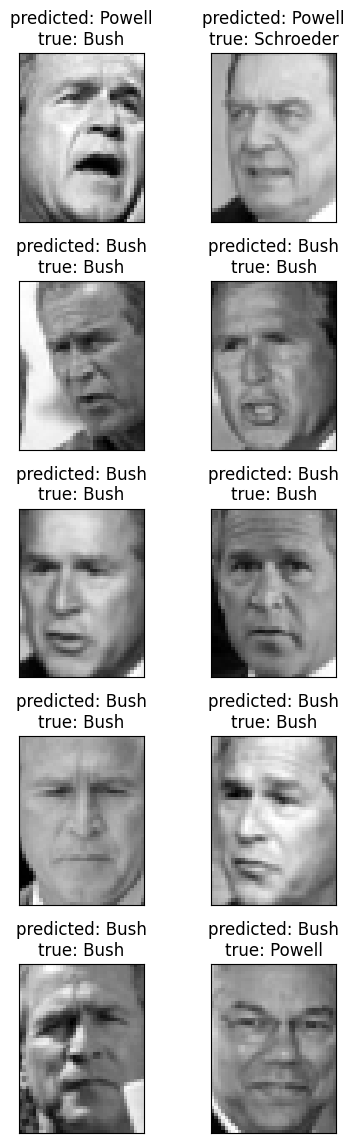

In [20]:
# Get the prediction and actual titles and store in a list
prediction_titles = []
for i in range(y_pred.shape[0]):
  title =  get_Title(y_pred, y_test, target_names, i)
  prediction_titles.append(title)

# Plot the result of the prediction on a portion of the test set
plot_gallery(X_test, prediction_titles, h, w, n_row=5, n_col= 2)

## Plotting the eigen faces

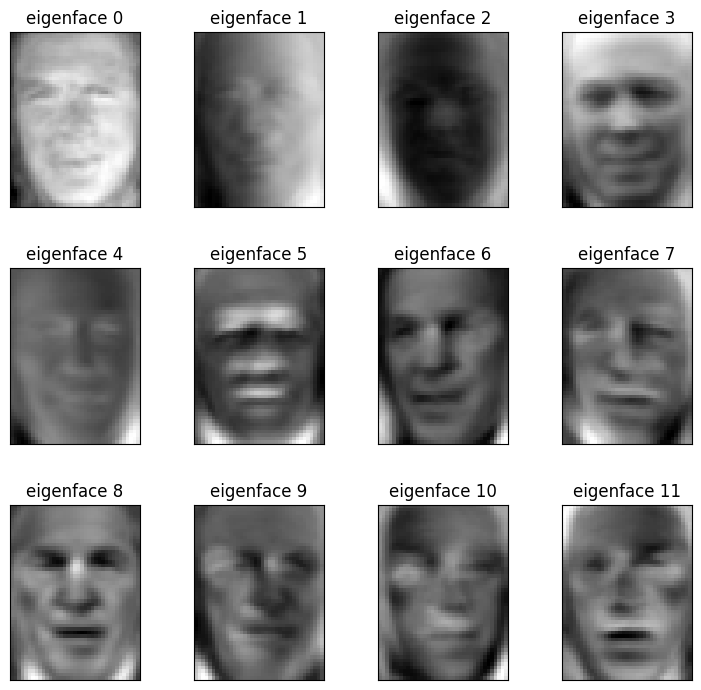

In [21]:
# Plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

### Please answer the questions below to complete the experiment:




In [22]:
#@title State True or False: The dataset LFW, contains a set of EigenFaces which we use to train our Machine Learning model? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["","True","False"]

In [23]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [24]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good" #@param {type:"string"}


In [25]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [26]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [27]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1518
Date of submission:  17 Jan 2025
Time of submission:  18:46:01
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
